In [29]:
from random import random

import seaborn as sns
import pandas as pd

# Understanding Correlation

If you have a collection of items (such as baseball players), and each item has a number of parameters (such as stats and attributes), one of the basic questions for analytics is "how much does one parameter imply another". Ie: "How much does grit affect batting average". 

Note that this doesn't talk talking causation - correlation, notoriously, does not imply causation - but importantly correlation doesn't even try. Correlation is a derived statistic. Determining mechanisms and logical links is a much harder task - made significantly easier for us becuase so many of our independent variables (typically player attributes) are uncorrelated randomly generated numbers.

## R-Value and numbers

Correlation is represented by unitless constant from -1 to 1, known as the **r-value**. If every time a player hits, they hit a home run, then hits and home runs are perfectly correlated - they have an r-value of 1. All serieses have a correlation with themselves of "1".

Additionally, linear transformations - offsets and scaling - don't change correlation, as shown below:

In [23]:
print("All of these values have an r-value of 1 (or -1):")
df = pd.DataFrame(
    {f"player_{i}": {
        "hits": i + 10, 
        "home_runs": i + 10, 
        "slugging": (i+10)*4,
        "all_time_hits": i + 20,
        "nega-hits": -i,
    } for i in range(10)}
).T
display(df)

print("Correlations:")
df.corr()["hits"]

All of these values have an r-value of 1 (or -1):


,hits,home_runs,slugging,all_time_hits,nega-hits
player_0,10,10,40,20,0
player_1,11,11,44,21,-1
player_2,12,12,48,22,-2
player_3,13,13,52,23,-3
player_4,14,14,56,24,-4
player_5,15,15,60,25,-5
player_6,16,16,64,26,-6
player_7,17,17,68,27,-7
player_8,18,18,72,28,-8
player_9,19,19,76,29,-9


Correlations:


hits             1.0
home_runs        1.0
slugging         1.0
all_time_hits    1.0
nega-hits       -1.0
Name: hits, dtype: float64

## Understanding r-values: generally

The following is bad statistics, but still useful!

We are going to take two series of one million random numbers each, named "A" and "B". Becuase these are each randomly generated, the correlation between them is very low - ideally, the r-value would be 0, but random variation will make it a small but nonzero number.

Then, we are going to "dillute" A by B in varying percents. The "25%_A" series is 25% A and 75% B, while the "99.9%_A" is 99.9% A and only 0.1% B. By calculating the correlation between A and the various dilutions of A, we can see how different r-values correspond to different "percent contributions".

In [64]:
PERCENTS = (0.01, 0.1, 1, 5, 10, 25, 50, 60, 70, 80, 90, 95, 99, 99.9, 99.99)

df = pd.DataFrame(
    {
        "A": [random() * 100 for __ in range(1_000_000)],
        "B": [random() * 100 for __ in range(1_000_000)]
    }
)

for percent in PERCENTS:
    df[f"{percent:.2f}%_a"] = df["A"] * (percent / 100) + df["B"] * (1 - (percent / 100))

display(df)

corr_df = pd.DataFrame([PERCENTS, df.corrwith(df["A"]).iloc[1:-1]]).T
corr_df.columns = ["%_A", "r_value"]
display(corr_df)

,A,B,0.01%_a,0.10%_a,1.00%_a,5.00%_a,10.00%_a,25.00%_a,50.00%_a,60.00%_a,70.00%_a,80.00%_a,90.00%_a,95.00%_a,99.00%_a,99.90%_a,99.99%_a
0,20.858082,51.271424,51.268383,51.241011,50.967291,49.750757,48.230090,43.668089,36.064753,33.023419,29.982085,26.940750,23.899416,22.378749,21.162215,20.888495,20.861123
1,33.028249,15.031804,15.033604,15.049801,15.211769,15.931626,16.831449,19.530915,24.030027,25.829671,27.629316,29.428960,31.228605,32.128427,32.848285,33.010253,33.026450
2,22.756001,79.624598,79.618911,79.567730,79.055912,76.781168,73.937738,65.407449,51.190300,45.503440,39.816580,34.129721,28.442861,25.599431,23.324687,22.812870,22.761688
3,1.793184,85.487151,85.478782,85.403457,84.650212,81.302453,77.117755,64.563660,43.640168,35.270771,26.901374,18.531978,10.162581,5.977883,2.630124,1.876878,1.801554
4,86.163118,21.484654,21.491122,21.549332,22.131438,24.718577,27.952500,37.654270,53.823886,60.291732,66.759579,73.227425,79.695272,82.929195,85.516333,86.098440,86.156650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,31.320092,44.771048,44.769703,44.757597,44.636539,44.098500,43.425953,41.408309,38.045570,36.700474,35.355379,34.010283,32.665187,31.992640,31.454601,31.333543,31.321437
999996,8.422182,60.895386,60.890138,60.842913,60.370654,58.271726,55.648065,47.777085,34.658784,29.411463,24.164143,18.916823,13.669502,11.045842,8.946914,8.474655,8.427429
999997,5.820584,80.407137,80.399679,80.332551,79.661272,76.677810,72.948482,61.760499,43.113861,35.655205,28.196550,20.737895,13.279239,9.549912,6.566449,5.895171,5.828043
999998,70.194446,74.111646,74.111255,74.107729,74.072474,73.915786,73.719926,73.132346,72.153046,71.761326,71.369606,70.977886,70.586166,70.390306,70.233618,70.198363,70.194837


,%_A,r_value
0,0.01,0.000295
1,0.10,0.000395
2,1.00,0.001297
3,5.00,0.010399
4,10.00,0.052869
5,25.00,0.110754
6,50.00,0.316564
7,60.00,0.707316
8,70.00,0.832176
9,80.00,0.919205


We can repeat this for many % dilutions and get a continuous plot:

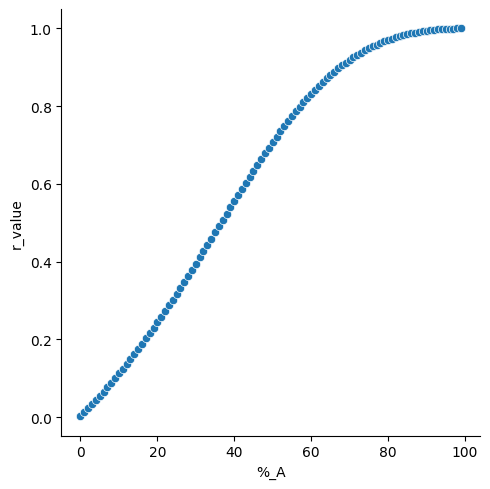

In [69]:
incs = range(0, 100, 1)

df = pd.DataFrame(
    {
        "A": [random() * 100 for __ in range(1_000_000)],
        "B": [random() * 100 for __ in range(1_000_000)]
    }
)

dilute_df = pd.DataFrame({f"{percent:.2f}%_a": df["A"] * (percent / 100) + df["B"] * (1 - (percent / 100)) for percent in incs})

corr_df = pd.DataFrame([incs, dilute_df.corrwith(df["A"])]).T
corr_df.columns = ["%_A", "r_value"]

plt = sns.relplot(data=corr_df, y="r_value", x="%_A")

In [73]:
for i, v in corr_df.T.to_dict().items():
    print(f"{i}: {v}")

0: {'%_A': 0.0, 'r_value': 0.0018981658206056083}
1: {'%_A': 1.0, 'r_value': 0.011983354393708687}
2: {'%_A': 2.0, 'r_value': 0.02227057330077956}
3: {'%_A': 3.0, 'r_value': 0.03276258768168987}
4: {'%_A': 4.0, 'r_value': 0.043462000649062464}
5: {'%_A': 5.0, 'r_value': 0.05437122997584212}
6: {'%_A': 6.0, 'r_value': 0.06549248313138367}
7: {'%_A': 7.0, 'r_value': 0.0768277306404594}
8: {'%_A': 8.0, 'r_value': 0.08837867775423072}
9: {'%_A': 9.0, 'r_value': 0.1001467344397072}
10: {'%_A': 10.0, 'r_value': 0.11213298371478513}
11: {'%_A': 11.0, 'r_value': 0.12433814837978951}
12: {'%_A': 12.0, 'r_value': 0.13676255622383532}
13: {'%_A': 13.0, 'r_value': 0.14940610381529884}
14: {'%_A': 14.0, 'r_value': 0.16226821902044175}
15: {'%_A': 15.0, 'r_value': 0.1753478224327438}
16: {'%_A': 16.0, 'r_value': 0.18864328793762336}
17: {'%_A': 17.0, 'r_value': 0.20215240268288434}
18: {'%_A': 18.0, 'r_value': 0.2158723267739382}
19: {'%_A': 19.0, 'r_value': 0.229799553064186}
20: {'%_A': 20.0, 'r_v